In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [118]:
# Lectura de las imágenes

def load_images(path1, path2):
    img = cv.imread(path1)
    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

    img2 = cv.imread(path2)
    img2 = cv.cvtColor(img2,cv.COLOR_BGR2RGB)
    gray2 = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)

    fig = plt.figure(figsize=(8,8), dpi=140)
    ax1=plt.subplot(121)
    ax1.imshow(img)
    ax1.axis("off");
    ax1=plt.subplot(122)
    ax1.imshow(img2)
    ax1.axis("off");
    
    return gray, gray2

In [137]:
# LBP (Local Binary Patterns)

def lbp(img):
    rows = img.shape[0]
    columns = img.shape[1]

    # Indexes to navigate through neighbours
    h_idx = np.array([-1, -1,  0,  1,  1,  1,  0, -1])
    v_idx = np.array([ 0,  1,  1,  1,  0, -1, -1, -1])

    lbp = np.zeros((rows, columns))

    for i in range(1, rows - 1):
        for j in range(1, columns - 1):
            p = img[i, j]
            nb = img[v_idx + i, h_idx + i]
            lbp[i, j] = np.sum((2**np.arange(8)) * (nb >= p))
            
    return lbp[1:-1, 1:-1]

In [138]:
# Plot results

def plot_results(lbp1, lbp2):
    f, axs = plt.subplots(2, 2, gridspec_kw={'height_ratios': [3, 2]}, figsize=(14,14))
    axs[0, 0].imshow(lbp1, 'gray', vmin=0, vmax=2**8)
    axs[0, 0].axis("off")
    axs[0, 1].imshow(lbp2, 'gray', vmin=0, vmax=2**8)
    axs[0, 1].axis("off")
    axs[1, 0].hist(lbp1.ravel())
    axs[1, 1].hist(lbp2.ravel());

(298, 298)

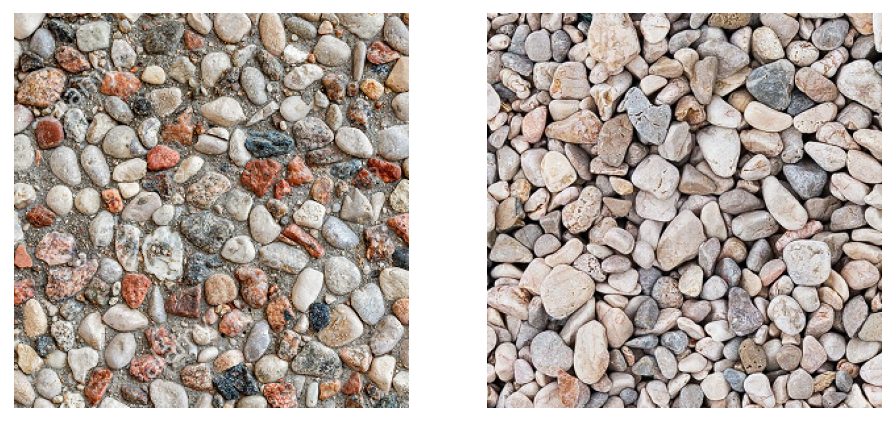

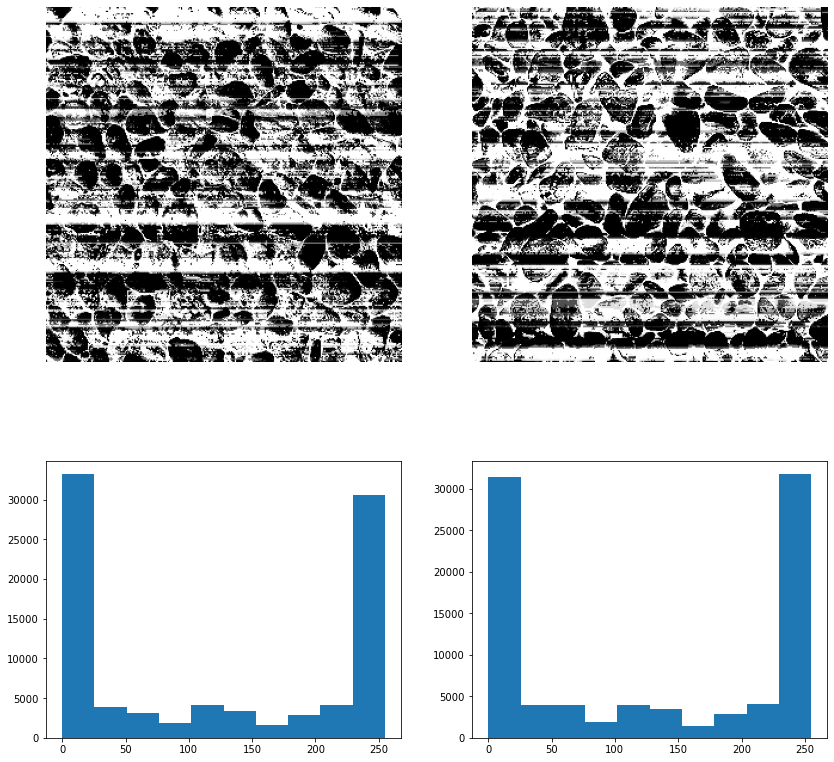

In [139]:
# Stones test

img1, img2 = load_images('./img/piedras1.png', './img/piedras2.png')
lbp1 = lbp(img1)
lbp2 = lbp(img2)
plot_results(lbp1, lbp2)

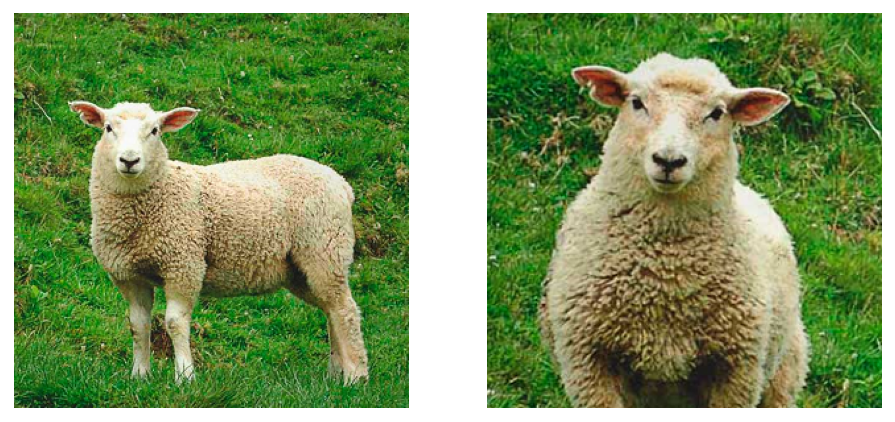

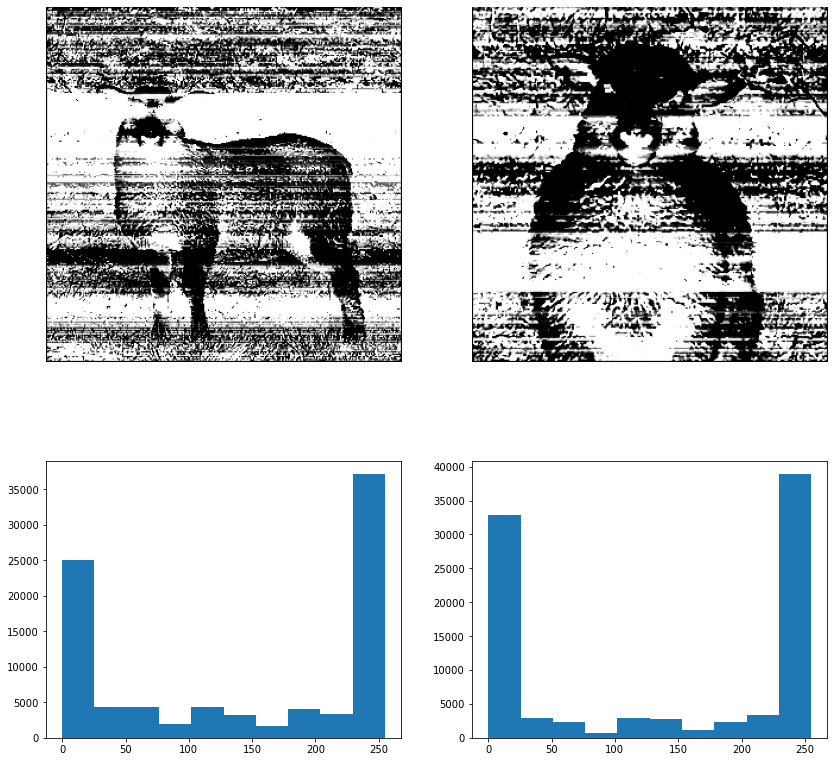

In [128]:
# Sheep test

img1, img2 = load_images('./img/oveja1.png', './img/oveja2.png')
lbp1 = lbp(img1)
lbp2 = lbp(img2)
plot_results(lbp1, lbp2)

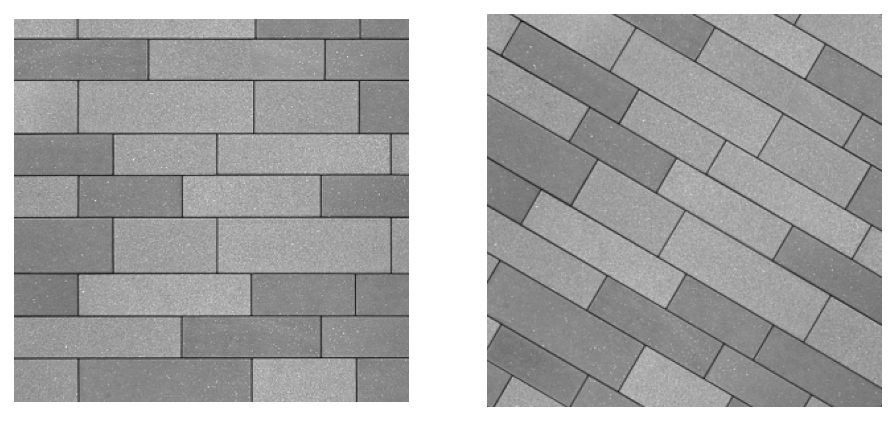

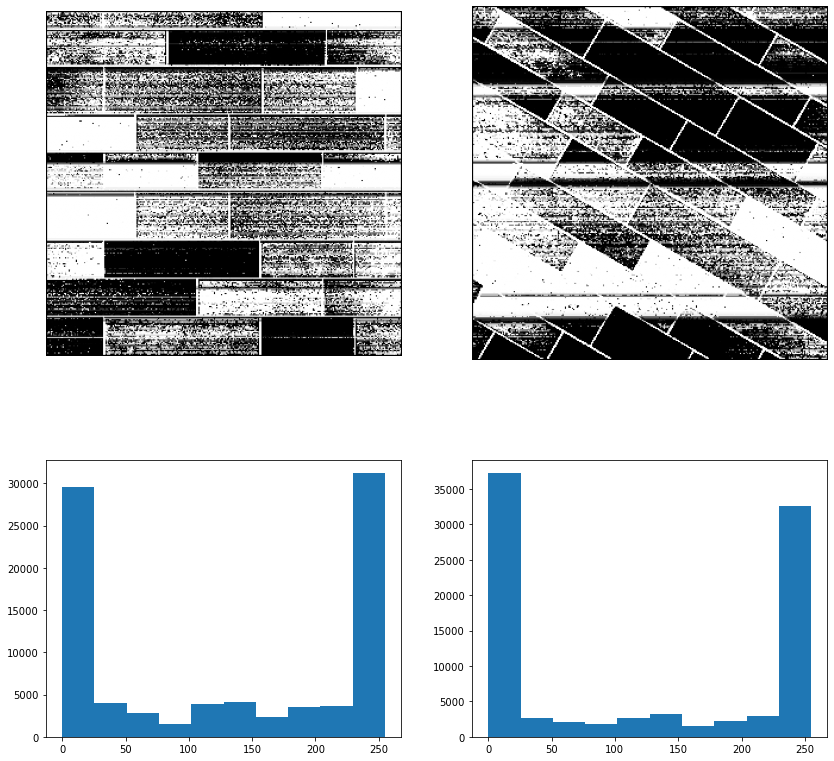

In [129]:
# Bricks test

img1, img2 = load_images('./img/ladrillos1.png', './img/ladrillos2.png')
lbp1 = lbp(img1)
lbp2 = lbp(img2)
plot_results(lbp1, lbp2)